In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import load_model
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

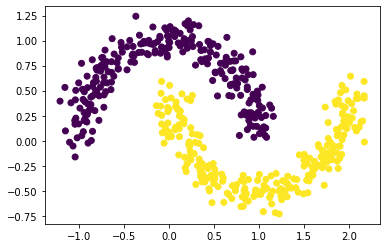

In [2]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y);

In [3]:
X[0].shape
X

array([[ 8.30676427e-01, -4.09935810e-01],
       [ 7.98355288e-01,  8.37612175e-01],
       [ 1.05046846e+00, -4.85161929e-01],
       [-2.58142758e-01,  9.80008438e-01],
       [ 3.30681598e-01,  1.14763307e+00],
       [ 1.26625226e+00, -4.96983608e-01],
       [ 1.07616580e+00, -3.85878358e-01],
       [ 5.64510528e-02,  1.10604396e+00],
       [ 5.87095987e-01,  6.69691770e-01],
       [ 1.76040471e+00, -2.06327891e-01],
       [ 1.00458991e+00,  7.03051390e-02],
       [-6.45719841e-01,  5.10437812e-01],
       [ 1.54254256e+00, -5.20178637e-01],
       [ 3.65210907e-01,  7.89799595e-01],
       [ 1.15098343e+00, -5.03033666e-01],
       [ 1.22244849e+00, -5.03918512e-01],
       [ 1.98971893e+00,  3.98966063e-01],
       [ 9.34292468e-01,  4.18991820e-01],
       [ 4.94958027e-01, -4.27205339e-01],
       [ 1.57127357e+00, -3.59203356e-01],
       [ 1.95678367e+00,  3.31919974e-01],
       [ 2.09927798e+00,  4.22134447e-01],
       [-8.26245842e-02,  1.66775129e-01],
       [ 8.

In [4]:
model = Sequential([
    Dense(4, input_shape=(2,)), 
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid')  
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [6]:
# build the computation graph
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# train the model
h = model.fit(X, y, epochs=50, batch_size=500, verbose=1, validation_split=0.2)


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6714 - accuracy: 0.4900 - val_loss: 0.6660 - val_accuracy: 0.6400
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 0.6701 - accuracy: 0.5800 - val_loss: 0.6654 - val_accuracy: 0.7300
Epoch 3/50
1/1 [==============================] - 0s 34ms/step - loss: 0.6692 - accuracy: 0.7000 - val_loss: 0.6650 - val_accuracy: 0.7600
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 0.6685 - accuracy: 0.7600 - val_loss: 0.6646 - val_accuracy: 0.7900
Epoch 5/50
1/1 [==============================] - 0s 66ms/step - loss: 0.6678 - accuracy: 0.7850 - val_loss: 0.6643 - val_accuracy: 0.8100
Epoch 6/50
1/1 [==============================] - 0s 108ms/step - loss: 0.6672 - accuracy: 0.7950 - val_loss: 0.6639 - val_accuracy: 0.8200
Epoch 7/50
1/1 [==============================] - 0s 103ms/step - loss: 0.6667 - accuracy: 0.8025 - val_loss: 0.6636 - val_accuracy: 0.8200
Epoch 8/50
1/1 [===========

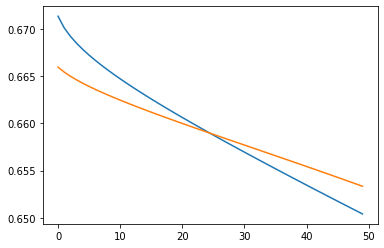

In [8]:
# plot the learning curve
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss']);

In [9]:
# loss and accuracy
score = model.evaluate(X, y, batch_size=500)
print(score)

1/1 [==============================] - 0s 42ms/step - loss: 0.6507 - accuracy: 0.8080
[0.6507351398468018, 0.8080000281333923]


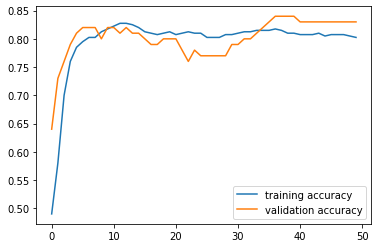

In [10]:
# plotting the score curve
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [11]:
# prediction on new data points
ypred = model.predict(X)
print(model.predict(X[:10]))

1/1 [==============================] - 0s 80ms/step
[[0.5196563 ]
 [0.48781487]
 [0.5257287 ]
 [0.45900854]
 [0.4677539 ]
 [0.53024465]
 [0.5245008 ]
 [0.46259594]
 [0.48606354]
 [0.5371256 ]]


In [12]:
print(y[:10])

[1 0 1 0 0 1 1 0 0 1]


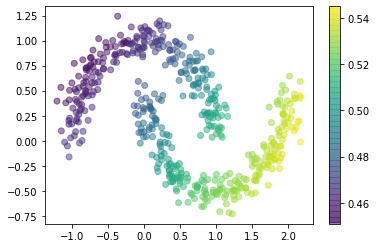

In [13]:
# plot predictions
plt.scatter(X[:,0], X[:,1], c = ypred, alpha = 0.5)
plt.colorbar();

In [14]:
# save model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
network = load_model("mnist_model.h5")
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


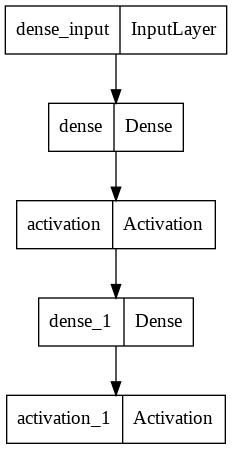

In [16]:
plot_model(network,
   to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)